# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Verifiquei corretamente o Graphviz porém não funcionou, utilizei o seaborn no lugar
## from sklearn.tree import export_graphviz
## import graphviz 

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [63]:
imoveis = pd.read_csv('housing.csv')

imoveis.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [65]:
# Tratar valores ausentes
imoveis = imoveis.dropna()

# Verificar novamente após remoção
print(imoveis.isnull().sum())

# Separar as variáveis independentes (X) e a variável dependente (y)

X = imoveis.drop('median_house_value', axis=1)
y = imoveis['median_house_value']

# Identificar as colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

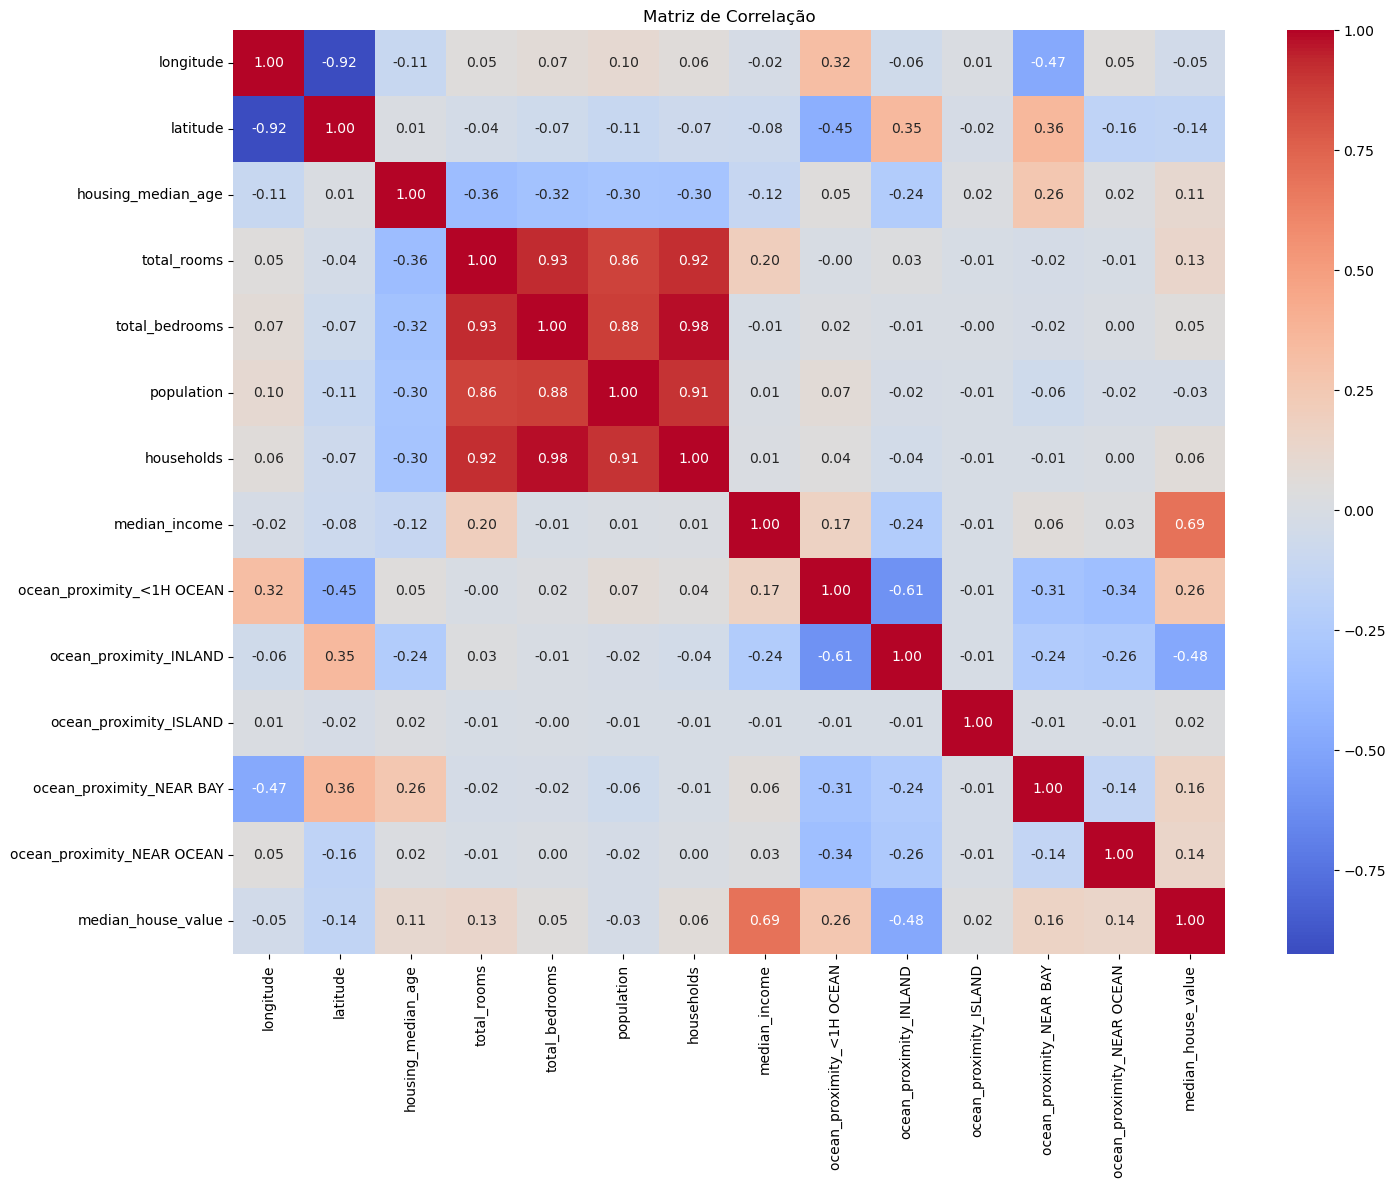

In [67]:
# Criar um transformador para aplicar OneHotEncoding às colunas categóricas
if not categorical_cols.empty:
    encoder = OneHotEncoder()
    encoded_categorical = encoder.fit_transform(X[categorical_cols]).toarray()
    
    # Criar um DataFrame com as colunas codificadas
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))
    
    # Concatenar o DataFrame original (sem as colunas categóricas) com o DataFrame das colunas codificadas
    X = X.drop(categorical_cols, axis=1)
    X = pd.concat([X.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)
else:
    print("Nenhuma coluna categórica encontrada para codificação.")

# Adicionar a variável dependente para calcular a correlação
data_with_target = pd.concat([X, y.reset_index(drop=True)], axis=1)

# Calcular a matriz de correlação
correlation_matrix = data_with_target.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [69]:
# Dividir os dados em conjuntos de treino (70%), validação (15%) e teste (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar os formatos dos conjuntos de treino, validação e teste
print(f"Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")

Treino: (14303, 13), Validação: (3065, 13), Teste: (3065, 13)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [71]:
# Treinar a primeira árvore com profundidade máxima = 8
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

# Treinar a segunda árvore com profundidade máxima = 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [73]:
# Fazer previsões e avaliar o modelo de profundidade 8
y_train_pred_8 = tree_max_depth_8.predict(X_train)
y_test_pred_8 = tree_max_depth_8.predict(X_test)
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)
print(f"MSE de Treinamento (profundidade máxima = 8): {mse_train_8}")
print(f"MSE de Teste (profundidade máxima = 8): {mse_test_8}")

# Fazer previsões e avaliar o modelo de profundidade 2
y_train_pred_2 = tree_max_depth_2.predict(X_train)
y_test_pred_2 = tree_max_depth_2.predict(X_test)
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)
print(f"MSE de Treinamento (profundidade máxima = 2): {mse_train_2}")
print(f"MSE de Teste (profundidade máxima = 2): {mse_test_2}")

MSE de Treinamento (profundidade máxima = 8): 3155880403.6967554
MSE de Teste (profundidade máxima = 8): 3914734071.0229177
MSE de Treinamento (profundidade máxima = 2): 6712935748.755798
MSE de Teste (profundidade máxima = 2): 6814196954.22397


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

#### Desempenho no conjunto de treinamento:

A árvore com profundidade máxima de 8 tem um MSE de treinamento menor (3,155,880,403.70) comparado à árvore com profundidade máxima de 2 (6,712,935,748.76). Isso indica que a árvore com profundidade maior consegue ajustar melhor os dados de treinamento, capturando mais detalhes e variabilidade nos dados.

#### Desempenho no conjunto de teste:

A árvore com profundidade máxima de 8 também tem um MSE de teste menor (3,914,734,071.02) comparado à árvore com profundidade máxima de 2 (6,814,196,954.22). Isso sugere que a árvore com profundidade máxima de 8 tem um desempenho melhor em prever novos dados, ou seja, tem uma melhor capacidade de generalização.

**Com base nesses pontos, a árvore com profundidade máxima de 8 parece mais adequada. Ela apresenta um melhor desempenho tanto no conjunto de treinamento quanto no conjunto de teste, sugerindo que consegue capturar melhor os padrões nos dados e generalizar bem para novos dados.**

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

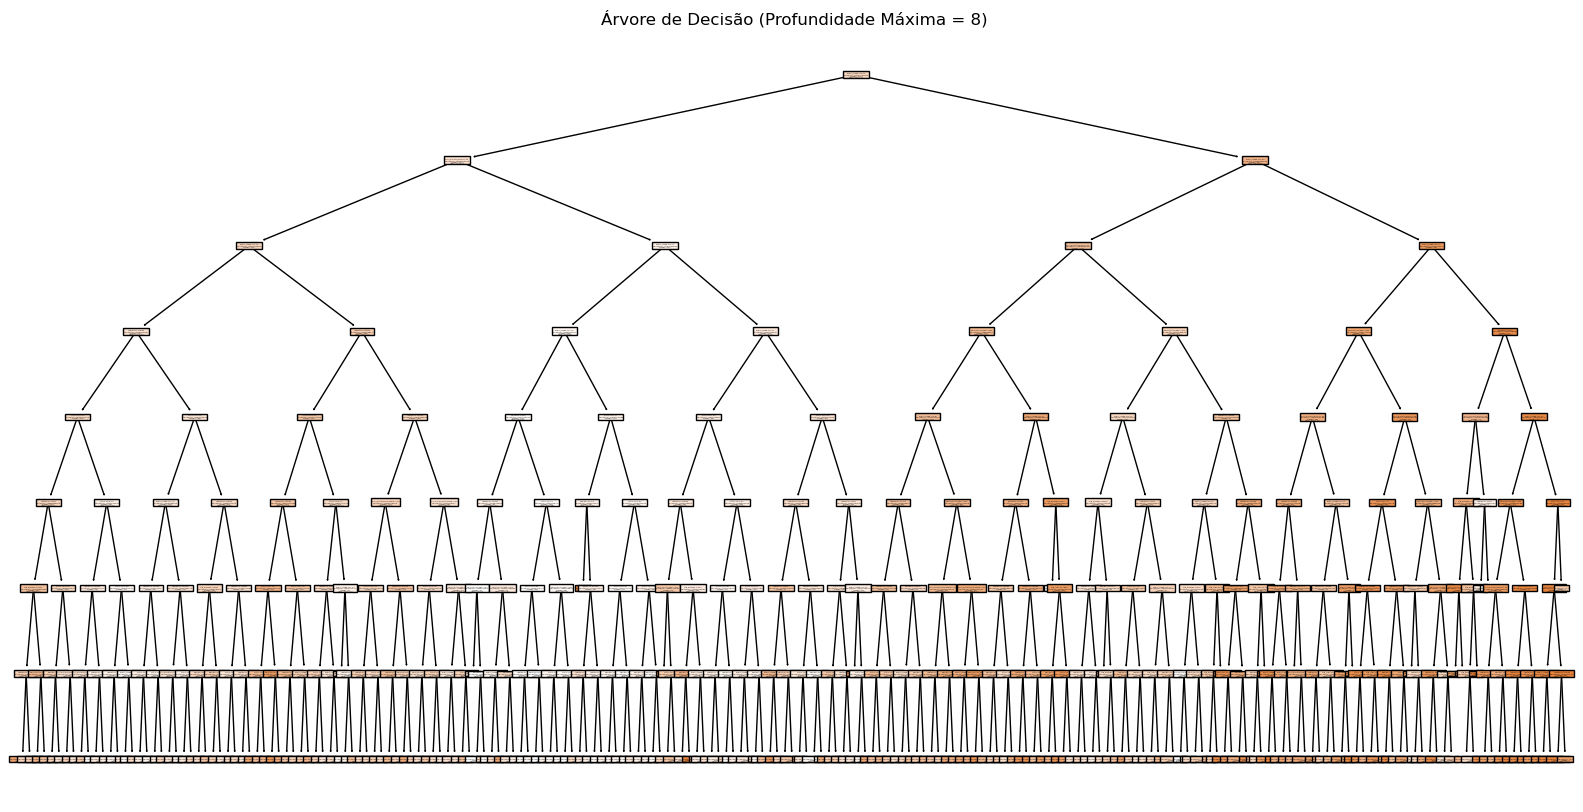

In [97]:
# Visualizar a árvore
plt.figure(figsize=(20, 10))
plot_tree(tree_max_depth_8, feature_names=X.columns, filled=True)
plt.title("Árvore de Decisão (Profundidade Máxima = 8)")
plt.show()